# Random Forest Classifier on Digits Dataset
This project is one of my Machine Learning mini projects. For this project, we have a digits dataset from sklearn.datasets. The dataset contains 1797 samples with each datapoint being a 8x8 image of a digit.

The goal of this project is to create a Random Forest Classifier model to predict the digits based on the images of the digits. 

In [36]:
## Importing the libraries
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Exploring the Data

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

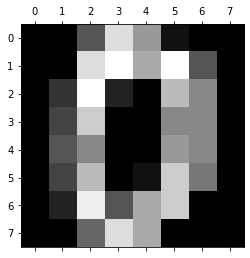

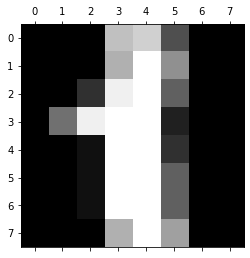

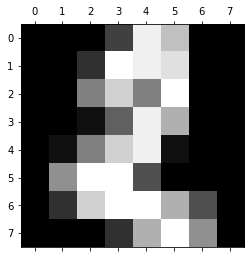

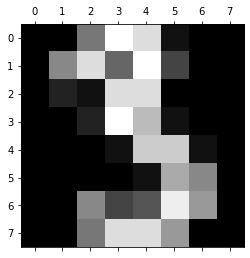

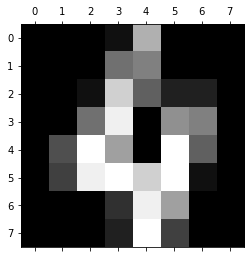

In [13]:
# Visualizing some images of the digits
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
plt.show()

In [14]:
# Create a dataframe for the data
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
# Add a 'target' column to the dataframe
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Building the Model
Finally, we can build our Random Forest Classifier model from the digits dataset

In [19]:
# Declaring the features and the label
features = df.drop('target', axis=1)
label = df['target']

In [22]:
# Split the data between training and test sets, in a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [23]:
# Build and fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Here, we are using the default parameters of our classifier (e.g using Gini as the measure of impurity, the number of estimators is set to 100, etc). Let's see how well this model will perform using this default parameters.

## Predictions and Evaluations

In [29]:
# Making predictions
pred = clf.predict(X_test)

In [31]:
# Measuring the accuracy of the model
acc = accuracy_score(y_test, pred)
acc

0.9833333333333333

In [35]:
# Create a Confusion Matrix
cm = confusion_matrix(y_test, pred)
cm

array([[41,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

We can take this Confusion Matrix to the next level by giving a better visualization of it using a heatmap.

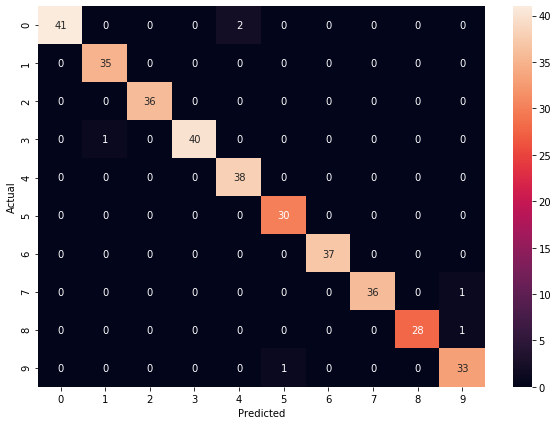

In [39]:
# A better visualization of the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Create a classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Based on the results above, it seems like our model did pretty well on making the predictions. Our model seems to be able to predict the digits '2' and '6' perfectly, having both F1 Scores being 1.00. On the other hand, we can see that the digit '9' is the hardest digit to predict using our model, having the lowest F1 Score of 0.96.